In [1]:
import tensorflow as tf

tf.__version__

'2.1.0'

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

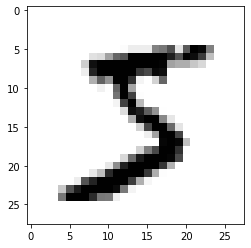

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
#print(x_train[0])


In [12]:
#normalize the datasets

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [15]:
#creating the model

model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #softmax for probablility distribution

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#train the model

model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2638 - accuracy: 0.9226
Epoch 2/10
60000/60000 [==============================] - 17s 280us/sample - loss: 0.1102 - accuracy: 0.9659
Epoch 3/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.0752 - accuracy: 0.9765
Epoch 4/10
60000/60000 [==============================] - 18s 292us/sample - loss: 0.0552 - accuracy: 0.9827
Epoch 5/10
60000/60000 [==============================] - 18s 293us/sample - loss: 0.0420 - accuracy: 0.9860
Epoch 6/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.0313 - accuracy: 0.9895
Epoch 7/10
60000/60000 [==============================] - 17s 280us/sample - loss: 0.0265 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.0221 - accuracy: 0.9925
Epoch 9/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0167 - accuracy: 0.9

In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 3s 285us/sample - loss: 0.1345 - accuracy: 0.9711
0.13449154580879402 0.9711


In [18]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [19]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [21]:
predictions = new_model.predict(x_test)

In [22]:
print(predictions)

[[1.4309457e-11 9.1255638e-13 4.5899676e-10 ... 1.0000000e+00
  2.8639020e-15 2.1347146e-08]
 [8.9498512e-19 3.4813776e-09 1.0000000e+00 ... 1.6790145e-16
  2.3543574e-19 1.9517727e-25]
 [1.2659830e-12 9.9999988e-01 5.9344374e-09 ... 9.7755638e-08
  3.8069697e-08 7.3467903e-13]
 ...
 [2.3823964e-15 1.6972480e-09 1.6430660e-13 ... 1.9160000e-08
  2.4364837e-12 2.7958971e-10]
 [7.7404110e-16 2.3803713e-14 4.7996239e-17 ... 3.5439977e-14
  7.8048423e-08 5.4227059e-20]
 [4.0370374e-16 2.2077661e-14 8.7240469e-17 ... 7.7979208e-20
  2.0782544e-13 8.6920576e-17]]


In [23]:
import numpy as np

In [26]:
print(np.argmax(predictions[5]))

1


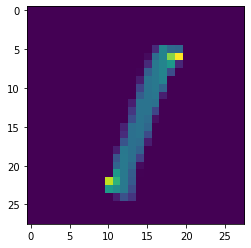

In [27]:
plt.imshow(x_test[5])
plt.show()